In [1]:
import sys
sys.path.append('/Users/leah/Columbia/courses/19summer/SocialBehavior/SocialBehaviorptc')

In [2]:
from socialbehavior.distributions.sigmoidnormal import SigmoidNormal

import torch
from torch.distributions import Normal

import numpy as np
import numpy.random as npr

import matplotlib.pyplot as plt
%matplotlib inline

# Sigmoid-normal distribution

- parameters: $\mu, \sigma$, lower & upper bounds $l,u$.

- generative process:
    
    $z \sim N(0,1)$

    $x = (u-l) * \sigma (\mu + \sigma z) + l $



## Consider one-dimensional sigmoid-normal distribution.

### fix [l, u] = [0, 1]. explore the effects of different $\mu, \sigma$.

In [3]:
D = 1

bounds = np.array([[0, 1]])

log_sigma = torch.zeros(D, dtype=torch.float64)

alpha = 1

In [4]:
def get_t(val):
    # get tensor
    return torch.tensor([val], dtype=torch.float64)

In [5]:
data = np.linspace(0, 1, 100)[:, None]
data = torch.tensor(data, dtype=torch.float64)

check distribution

In [6]:
def get_dist(mu, log_sigma):
    return SigmoidNormal(get_t(mu), get_t(log_sigma), bounds)

In [7]:
def plot_dist(mu, log_sigma, ax, title=None):
    sn = get_dist(mu, log_sigma)
    ax.plot(data.numpy(), sn.pdf(data).numpy())
    if title is not None:
        ax.title.set_text(title)

###  explore mu

In [8]:
mu_list = [-2, -1, 0, 1, 2]

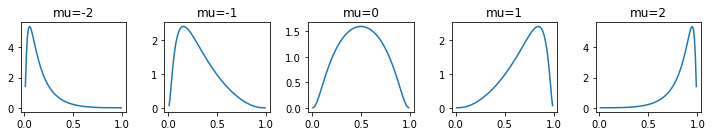

In [9]:
fig, axs = plt.subplots(1, 5, figsize=(10, 2))

for ax, mu in zip(axs, mu_list):
    plot_dist(mu, np.log(1), ax, 'mu={}'.format(mu))
    
plt.tight_layout()

In [78]:
sn = get_dist(0.4, np.log(3.16))

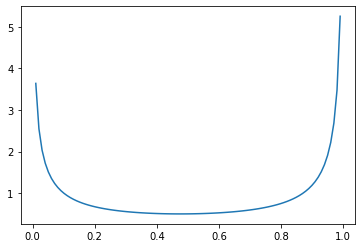

In [79]:
plt.plot(data.numpy(), sn.pdf(data).numpy())

In [80]:
samples = sn.sample((1000,))

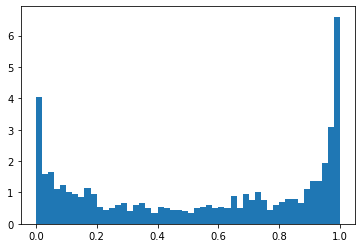

In [81]:
plt.hist(samples.numpy(), bins=50, density=True);

In [82]:
def logit(x):
    return np.log(x) - np.log(1-x)

In [83]:
logit(0.01)

-4.59511985013459

In [84]:
transformed_samples = logit(samples)

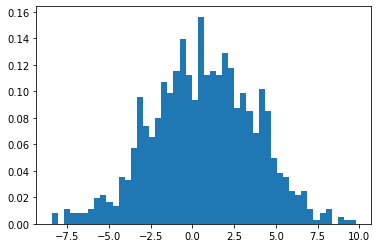

In [74]:
plt.hist(transformed_samples.numpy(), bins=50, density=True);

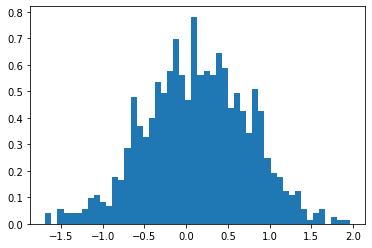

In [76]:
plt.hist(transformed_samples.numpy()*0.2, bins=50, density=True);

observation: 

- when mu = offset, it is symmetric.

- the distribution is symmetric around offset, and it is skewed to the value of mu.


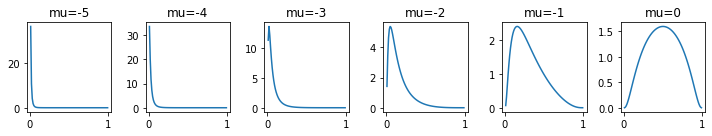

In [31]:
mu_list = [-5, -4, -3, -2, -1, 0]

fig, axs = plt.subplots(1, 6, figsize=(10, 2))

for ax, mu in zip(axs, mu_list):
    plot_dist(mu, np.log(1), ax, 'mu={}'.format(mu))
    
plt.tight_layout()

### explore sigma

In [11]:
log_sigma_list = np.log(np.array([0.5, 1, 1.5, 2, 5, 10]))

$\mu = 0 $

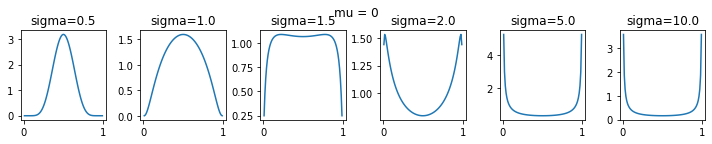

In [40]:
fig, axs = plt.subplots(1, 6, figsize=(10, 2))

for ax, log_sigma in zip(axs, log_sigma_list):
    plot_dist(0, log_sigma, ax, 'sigma={:.1f}'.format(np.exp(log_sigma)))

plt.suptitle('mu = 0');    
plt.tight_layout()

observation: 

- changes in convexity.. curvature

- can get bi-modal distribution.

- interestingly, if sigmas are too big, then the mass would concentrated in the boundaries -- we may want to constrain the sigmas.

$\mu=1$

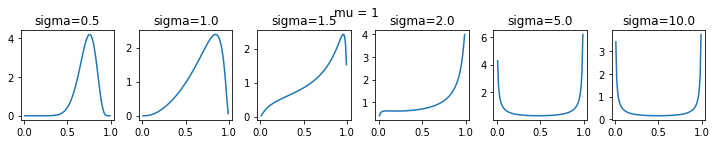

In [41]:
fig, axs = plt.subplots(1, 6, figsize=(10, 2))

for ax, log_sigma in zip(axs, log_sigma_list):
    plot_dist(1, log_sigma, ax, 'sigma={:.1f}'.format(np.exp(log_sigma)))

plt.suptitle('mu = 1');
plt.tight_layout()

$ \mu=2$

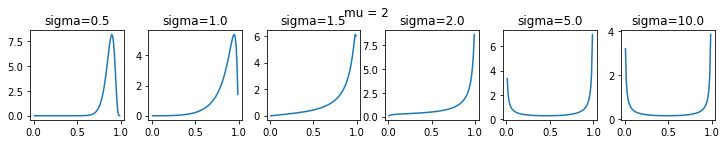

In [39]:
fig, axs = plt.subplots(1, 6, figsize=(10, 2))

for ax, log_sigma in zip(axs, log_sigma_list):
    plot_dist(2, log_sigma, ax, 'sigma={:.1f}'.format(np.exp(log_sigma)))

plt.suptitle('mu = 2');
plt.tight_layout()


# An overview

In [62]:
mu_list = [-2, -1, 0, 1, 2]
log_sigma_list = np.log([0.5, 1, 2, 5, 10])

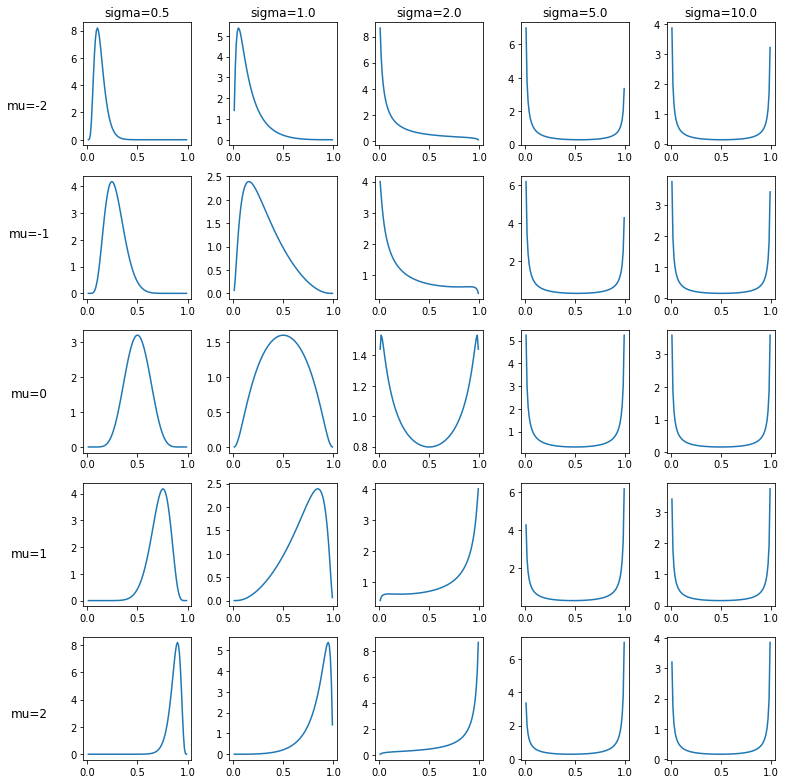

In [86]:
fig, axs = plt.subplots(5, 5, figsize=(11, 11))

for i in range(5):
    for j in range(5):
        plot_dist(mu_list[i], log_sigma_list[j], axs[i][j])

for i in range(1, 5):
    title = axs[i][0].set_title('mu={}'.format(mu_list[i]))
    title.set_position(np.array([-0.5, 0.5-0.05*i]))
   
for j in range(5):
    title = axs[0][j].set_title('sigma={:.1f}'.format(np.exp(log_sigma_list[j])))
    #title.set_position(np.array([-0.5*j, 0.5]))

axs[0,0].text(-0.8, 2.5, "mu=-2", size=12,
                           verticalalignment='center')
    
plt.tight_layout()